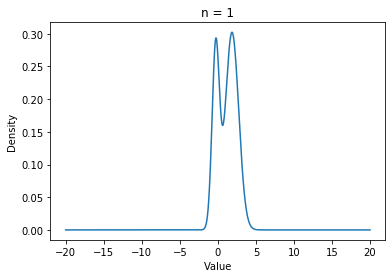

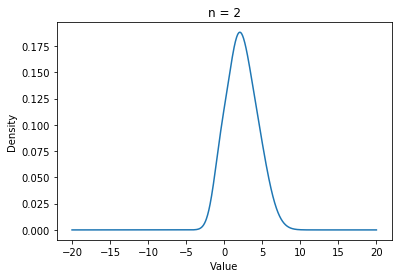

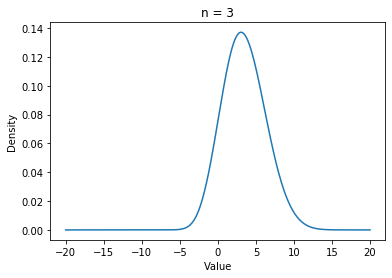

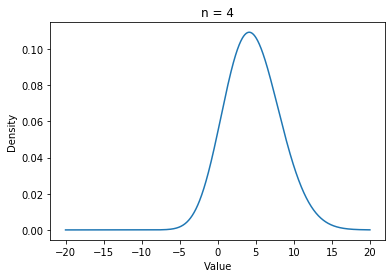

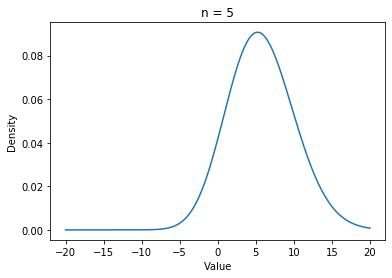

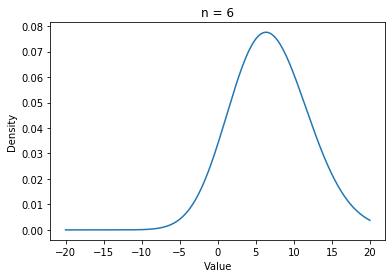

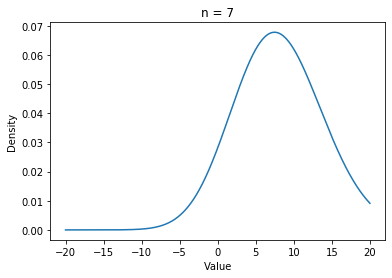

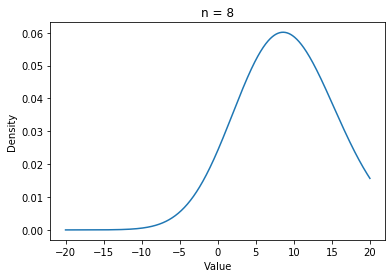

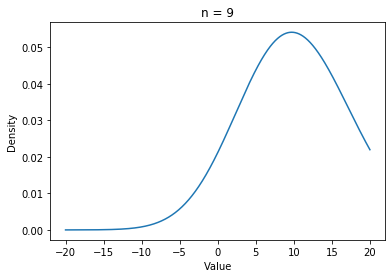

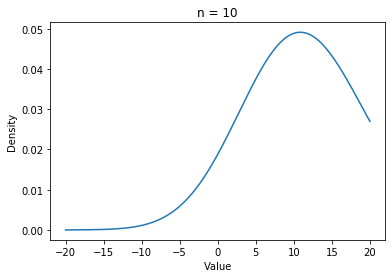

In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
import scipy.stats as stats
import scipy.special as sp

domain = np.linspace(-20, 20, 1000)

#При таких значениях параметров плотность Кси имеет два локальных максимума
a = -0.28
b = 0.48
c = 1.86
d =0.88

def sum_pdf(n, x):
    helpme = [((2**(n-k)) * sp.binom(n, k) * stats.norm.pdf(x, (n - k)*c + a*k, (n - k)*d + b*k)) for k in range(n+1)]
#    return stats.norm.pdf(x, (1/3)*a*n + (2/3)*n*c, (1/9)*b*n + (4/9)*n*d)
    return ((1 / 3)**n) * sum(helpme)


#Строим графики плотности для n=1..10
for n in range(1,11):
    plt.plot(domain, sum_pdf(n, domain))
    plt.title('n = ' + str(n))
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

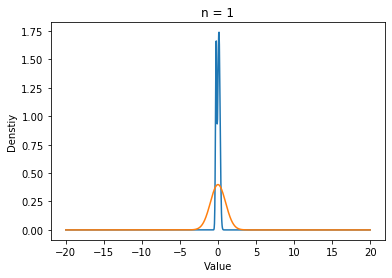

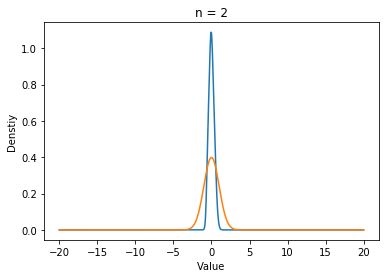

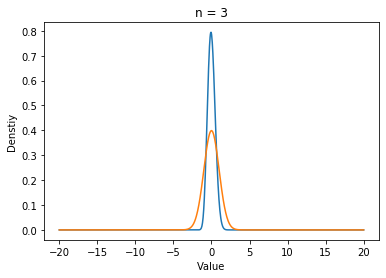

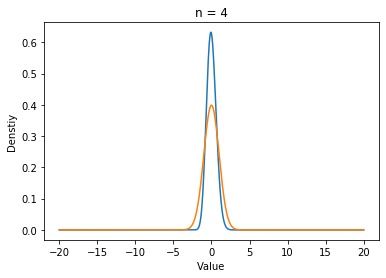

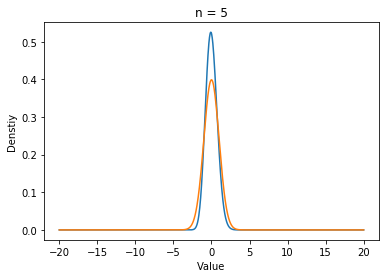

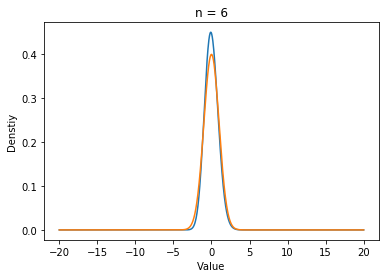

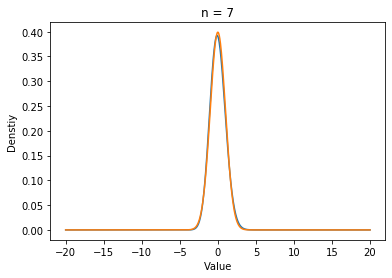

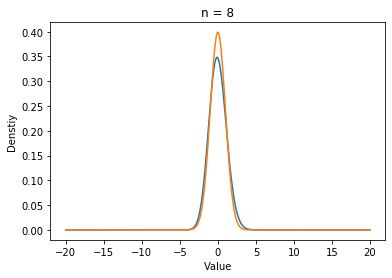

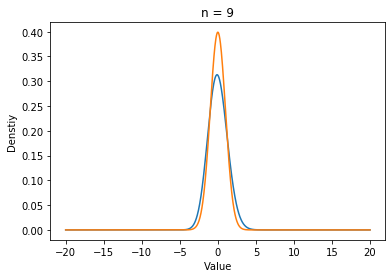

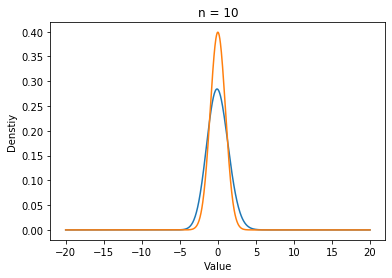

In [4]:
# expection equals n(a + 2c)/3 , dispersion is n(b/3 + 2d/3  - 4ac/9 + 2a^2/9 + 2c^2/9) 
disp =  n*((b/3)  + ((2*d)/3) - (4/9) * a * c + (2/9) * a*a + (2/9) * c*c)
def sum_center_norm(n, x):
    return ((disp)**(0.5)) * sum_pdf(n, x * ((disp)**(0.5)) + (n * (a + 2*c) / 3))

#Построим 10 графиков центрированной и нормированной суммы и стандартного нормального 
for n in range(1,11):
    plt.plot(domain, sum_center_norm(n, domain), label='sum_center_norm')
    plt.plot(domain, stats.norm.pdf(domain, 0, 1), label='Norm(0, 1)')
    plt.title('n = ' + str(n))
    plt.xlabel('Value')
    plt.ylabel('Denstiy')
    plt.show()